In [15]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, datasets

In [27]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

y_train.shape

(60000,)

In [ ]:
x_test = np.load("validation_x.npy")
y_test = np.load("validation_y.npy")

In [ ]:

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

In [17]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=2, batch_size=10,validation_data=(x_test,y_test))

Epoch 1/2
6000/6000 [==============================] - 22s 3ms/step - loss: 0.1114 - accuracy: 0.9657 - val_loss: 0.0499 - val_accuracy: 0.9843
Epoch 2/2
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.0350 - val_accuracy: 0.9886


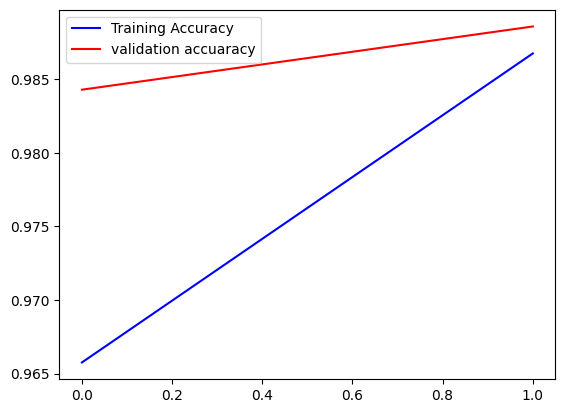

In [20]:
plt.plot(history.history['accuracy'],color='b',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='r',label='validation accuaracy')
plt.legend()

313/313 [==============================] - 0s 725us/step


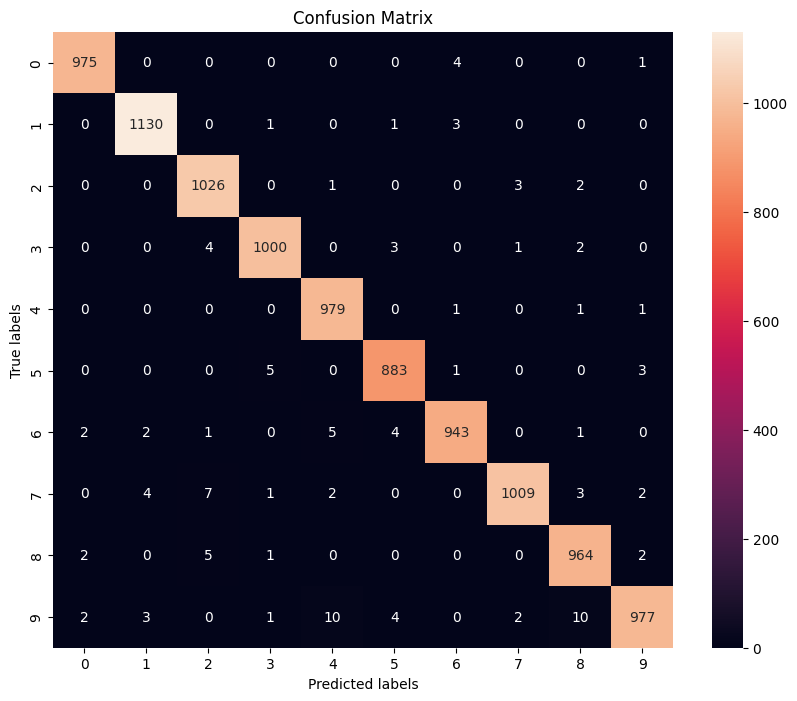

In [21]:
import seaborn as sns
y_test=tf.one_hot(y_test.astype(np.int32),depth=10)
# Predict classes probabilities for test data
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) 
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true_classes, y_pred_classes) 

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
